### 분류 알고리즘
- 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것입니다.

##### 대표적인 분류 알고리즘들
- 나이브 베이즈(Naive Bayes) : 베이즈 통계와 생성 모델에 기반
- 로지스틱 회귀(Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반
- 결정트리(Decision Tree) : 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신(Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
- 최소 근접 알고리즘(Nearest Neighbor) : 근접 거리 기준
- 심층 연결 기반 신경망(Neural Network)
- 앙상블(Ensemble) : 서로 다른(또는 같은) 머신러닝 알고리즘의 결합

### 결정트리와 앙상블
- 결정 트리(Decision Tree):
    - 장점
        1. 매우 쉽고 유연하게 적용될 수 있는 알고리즘
        2. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
    - 단점
        1. 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 함
        2. 복잡한 규칙 구조로 인해 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있음
        3. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요
        
    

- 앙상블(Ensemble)
    - 결정 트리의 과적합 단점이 앙상블 기법에서 장점으로 작용
    - 매우 많은 여러개의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 됨
    - GBM, XGBoost, LightGBM

### 결정 트리
- 결정 트리 알고리즘은 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만듭니다. (If-Else 기반 규칙)
- 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우합니다.

### 정보 균일도 측정 방법
- 정보 이득(Information Gain)
    - 엔트로피 : 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
    - 정보 이득 지수 = 1- 엔트로피 지수
    - 결정트리는 정보 이득이 높은 속성을 기준으로 분할

- 지니 계수
    - 불평등 지수를 나타내며, 0이 가장 평등하고 1로 갈수록 불평등
    - 머신러닝에서 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석되어 계수가 낮은 속성을 기준으로 분할


### 결정 트리 모델의 시각화(Decision Tree Visualization) 

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity = True, filled = True)

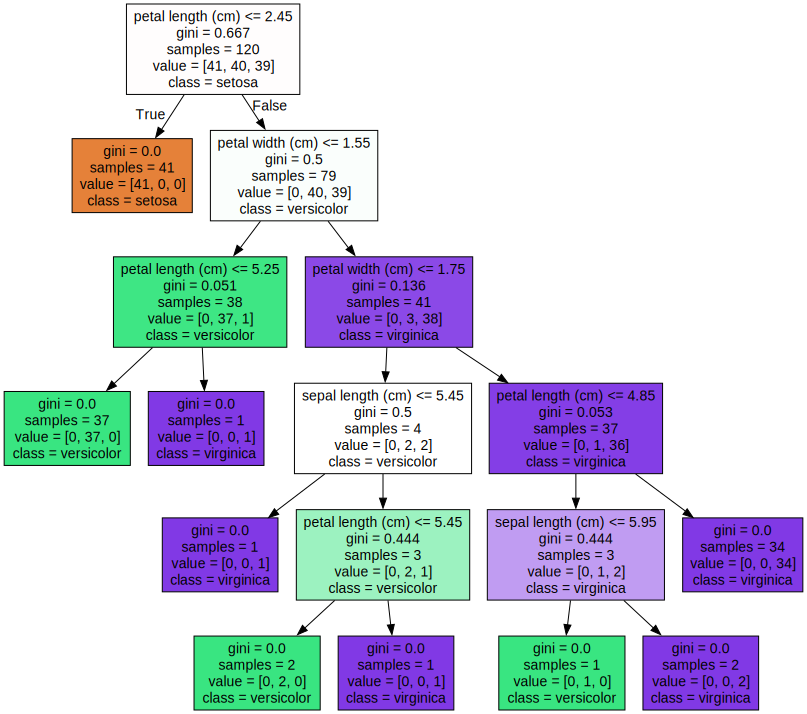

In [5]:
import graphviz

# 위에서 생성된 tree.dot 파일을 graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)